# Introduction to Regression with Neural Networks in TensorFlow

**Aim**: Predicting a number

In [2]:
import tensorflow as tf
print(tf.__version__)

2.19.0


# Creating data to view and fit

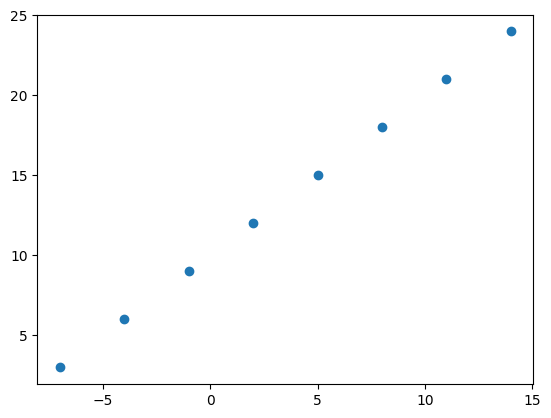

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# create features
X = np.array([-7., -4., -1.,2., 5., 8., 11.,14.  ])
# create labels
Y = np.array([3., 6., 9., 12., 15., 18., 21., 24.])

plt.scatter(X,Y)

# Input and Output shapes

In [4]:
# demo tensor
house_info = tf.constant(["bedroom", "bathroom", "garage"])
house_price = tf.constant([939700])
house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

# Create a model in tensorflow

* **create a model** - define the input and output layers alongside the hidden layers of a deep learning model
* **compiling the model** - define the loss function, optimiser and evaluation matrix
* **fitting a model** - trying to find patterns between X and Y

In [5]:
# set random seed
tf.random.set_seed(42)

X = tf.cast(tf.constant(X), dtype=tf.float32)
Y = tf.cast(tf.constant(Y), dtype=tf.float32)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

model.compile(
    loss= tf.keras.losses.mae,
    optimizer= tf.keras.optimizers.SGD(),
    metrics=["mae"]
)
model.fit(tf.expand_dims(X,axis=-1), Y, epochs=5)

Epoch 1/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 293ms/step - loss: 15.8091 - mae: 15.8091
Epoch 2/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 15.5279 - mae: 15.5279
Epoch 3/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 15.2466 - mae: 15.2466
Epoch 4/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 14.9657 - mae: 14.9657
Epoch 5/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 14.8332 - mae: 14.8332


In [6]:
# check X and y
X, Y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [7]:
# prediction
model.predict(np.array([[14.0]]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


array([[-4.930143]], dtype=float32)

# Improving the model
To improve our model, we alter almost every part of the 3 steps we went through before.

**Creating a model** - here you might want to add more layers, increase the number of hidden units (also called neurons) within each layer, change the activation functions of each layer.

**Compiling a model** - you might want to choose optimization function or perhaps change the learning rate of the optimization function.

**Fitting a model** - perhaps you could fit a model for more epochs (leave it training for longer) or on more data (give the model more examples to learn from).

In [8]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation=None),
    tf.keras.layers.Dense(1)
])

model.compile(
    loss= tf.keras.losses.mae,
    optimizer= tf.keras.optimizers.Adam(learning_rate=0.01),
    metrics=["mae"]
)
model.fit(tf.expand_dims(X,axis=-1), Y, epochs=100)

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 564ms/step - loss: 13.9193 - mae: 13.9193
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 12.9403 - mae: 12.9403
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 11.9726 - mae: 11.9726
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 11.0097 - mae: 11.0097
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 10.0452 - mae: 10.0452
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 9.0730 - mae: 9.0730
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 8.0856 - mae: 8.0856
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 7.0748 - mae: 7.0748
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 6.7132 - mae: 6.7132
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 7.1357 - mae: 7.1357
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 7.4717 - mae: 7.4717
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 7.5965 - mae: 7.5965
Epoch 13/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 

In [9]:
model.predict(np.array([[17.0]]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


array([[26.792736]], dtype=float32)

# Model Evaluation
```
building -> fitting -> eval -> tweak -> fit -> eval
```

you can visualise the following in a model:
* the data
* the model
* the training
* the prediction

In [10]:
# make bigger dataset
X = tf.range(-100, 100, 4)
Y = X+10
X, Y

(<tf.Tensor: shape=(50,), dtype=int32, numpy=
 array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
         -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
         -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
          32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
          76,   80,   84,   88,   92,   96], dtype=int32)>,
 <tf.Tensor: shape=(50,), dtype=int32, numpy=
 array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
        -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
         14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
         66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>)

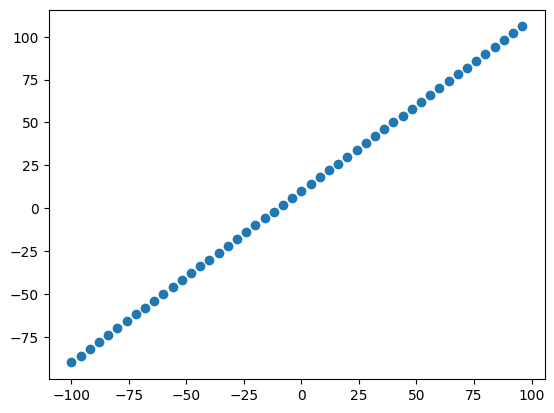

In [11]:
plt.scatter(X,Y)

### The 3 Sets

* **Training Set**: The data to train model on (7-8/10)
* **Validation Set**: To Validate the trained model (1/10)
* **Test Set**: To test model (1/10)

In [12]:
# split data into train and test
X_train = X[:40]
X_test = X[40:]

Y_train = X[:40]
Y_test = X[40:]

# Visualising the data

Visualising the data in charts and graphs

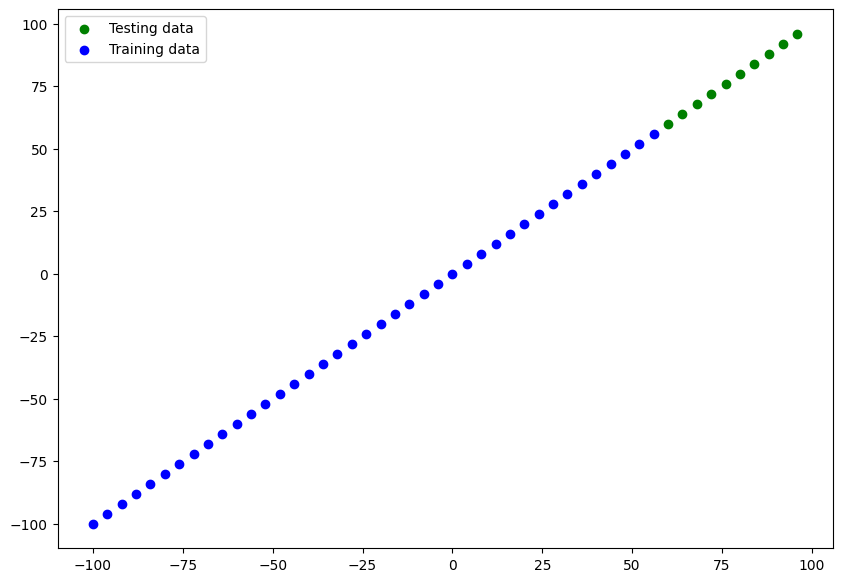

In [13]:
plt.figure(figsize=(10,7))
plt.scatter(X_test, Y_test, c="g", label="Testing data")
plt.scatter(X_train, Y_train, c="b", label="Training data")
plt.legend()

# building a neural network for this

In [14]:
model = tf.keras.Sequential(
   [ tf.keras.layers.Dense(1, input_shape=[1])]
)

model.compile(loss=tf.keras.losses.mae,
               optimizer=tf.keras.optimizers.SGD(), 
               metrics=["mae"])
model.summary()

c:\Users\shiva\AppData\Local\pypoetry\Cache\virtualenvs\ztm-ai-p_AevPqq-py3.10\lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 1)              │             2 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2 (8.00 B)

 Trainable params: 2 (8.00 B)

 Non-trainable params: 0 (0.00 B)

In [15]:
# fit and summarise
model.fit(X_train, Y_train, epochs=100, verbose=0)

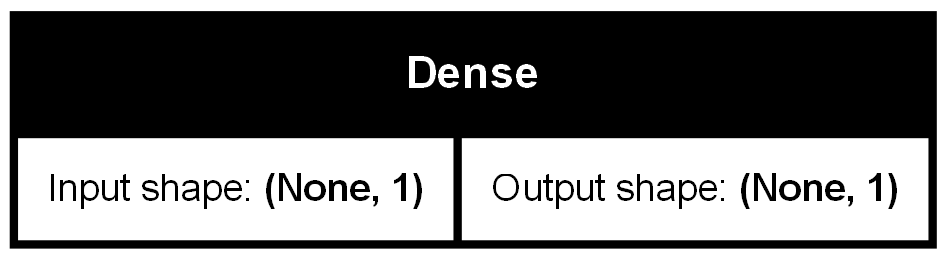

In [16]:
from tensorflow.keras.utils import plot_model

plot_model(model=model, show_shapes=True)

In [18]:
# visualising model's predictions
predictions = model.predict(X_test)
predictions

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


array([[ 63.69353 ],
       [ 67.93979 ],
       [ 72.18604 ],
       [ 76.432304],
       [ 80.67856 ],
       [ 84.92481 ],
       [ 89.171074],
       [ 93.41733 ],
       [ 97.66358 ],
       [101.90984 ]], dtype=float32)

In [31]:
def plot_pred(train_d, train_l, test_d, test_l, pred):
    plt.figure(figsize=(10,7))
    plt.scatter(test_d, test_l, c="g", label="Testing data")
    plt.scatter(train_d, train_l, c="b", label="Training data")
    plt.scatter(test_d, pred, c="r", label="Predictions")
    plt.legend()
    

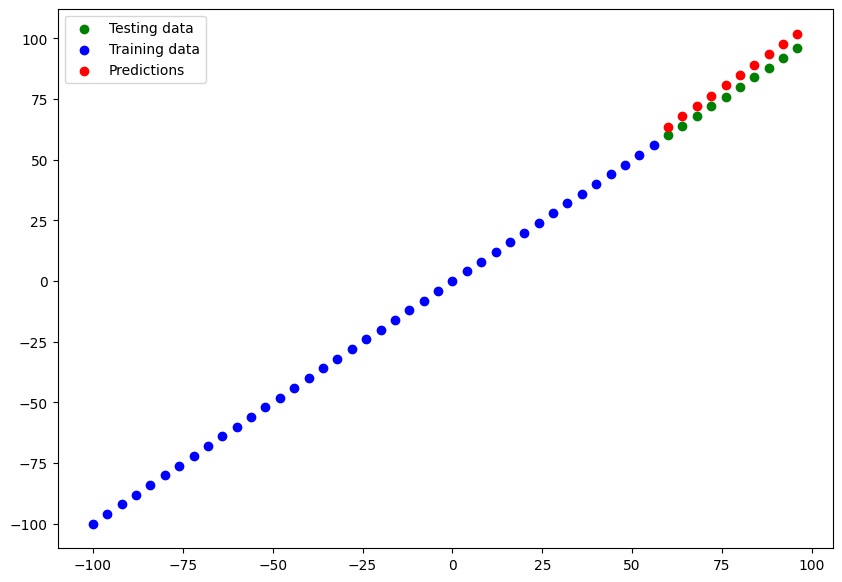

In [32]:
plot_pred(X_train, Y_train, X_test, Y_test, predictions)

# Analysis

In [46]:
mae = tf.keras.metrics.MeanAbsoluteError()
mae.update_state(Y_test, predictions)
mae_result = mae.result().numpy()
mse = tf.keras.metrics.MeanSquaredError()
mse.update_state(Y_test, predictions)
mse_result = mse.result().numpy()
rmse_result = np.sqrt(mse_result)

print(f"MAE: {mae_result}, MSE: {mse_result}, RMSE: {rmse_result}")


MAE: 4.8016862869262695, MSE: 23.556493759155273, RMSE: 4.853503227233887
